<a href="https://colab.research.google.com/github/feranzie/Sound-classification/blob/main/Copy_of_Copy_of_Bird_Sound_classification_model_using_Mask_RCNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas
import os
import json

In [ ]:
# load json details

In [ ]:

import pandas as pd
df = pd.read_json("/content/data2.json")

In [ ]:
df.head()

,id,gen,sp,ssp,en,rec,cnt,loc,lat,lng,...,lic,q,length,time,date,uploaded,also,rmk,bird-seen,playback-used
0,587992,Tetrao,urogallus,,Western Capercaillie,Simon Elliott,United Kingdom,"Great Britain, Perth and Kinross, Scotland",56.4117,-3.6589,...,//creativecommons.org/licenses/by-nc-nd/4.0/,A,2:32,06:30,1991-04-04,2020-09-12,[],"male display;very close, touches mic",yes,no
1,473721,Tetrao,urogallus,,Western Capercaillie,Simon Ernst,United Kingdom,"Great Britain (near Dunphail), Moray, Scotland",57.5173,-3.6848,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:06,10:30,2019-05-12,2019-05-12,[],"Not the exactly location, in way to preserve t...",yes,no
2,473720,Tetrao,urogallus,,Western Capercaillie,Simon Ernst,United Kingdom,"Great Britain (near Dunphail), Moray, Scotland",57.5173,-3.6848,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:09,10:30,2019-05-12,2019-05-12,[],"Not the exactly location, in way to preserve t...",yes,no
3,473716,Tetrao,urogallus,,Western Capercaillie,Simon Ernst,United Kingdom,"Great Britain (near Dunphail), Moray, Scotland",57.5173,-3.6848,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:10,10:30,2019-05-12,2019-05-12,[Troglodytes troglodytes],"Not the exactly location, in way to preserve t...",yes,no
4,473711,Tetrao,urogallus,,Western Capercaillie,Simon Ernst,United Kingdom,"Great Britain (near Dunphail), Moray, Scotland",57.5173,-3.6848,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,1:11,10:30,2019-05-12,2019-05-12,"[Regulus regulus, Troglodytes troglodytes]","Not the exactly location, in way to preserve t...",yes,no


In [ ]:
df.columns.values

array(['id', 'gen', 'sp', 'ssp', 'en', 'rec', 'cnt', 'loc', 'lat', 'lng',
       'alt', 'type', 'url', 'file', 'file-name', 'sono', 'lic', 'q',
       'length', 'time', 'date', 'uploaded', 'also', 'rmk', 'bird-seen',
       'playback-used'], dtype=object)

In [ ]:
len(df)

46712

In [ ]:
len(df['en'].unique())

429

In [ ]:
df['en'].unique()

array(['Western Capercaillie', 'Black Grouse', 'Rock Ptarmigan',
       'Willow Ptarmigan', 'Red-legged Partridge', 'Grey Partridge',
       'Common Quail', 'Japanese Quail', 'Common Pheasant',
       'Golden Pheasant', "Lady Amherst's Pheasant", 'Indian Peafowl',
       'White-faced Whistling Duck', 'West Indian Whistling Duck',
       'Brant Goose', 'Red-breasted Goose', 'Canada Goose',
       'Barnacle Goose', 'Bar-headed Goose', 'Snow Goose',
       'Greylag Goose', 'Taiga Bean Goose', 'Pink-footed Goose',
       'Tundra Bean Goose', 'Greater White-fronted Goose',
       'Lesser White-fronted Goose', 'Black Swan', 'Mute Swan',
       'Tundra Swan', 'Whooper Swan', 'Falkland Steamer Duck',
       'Egyptian Goose', 'Upland Goose', 'Kelp Goose', 'Common Shelduck',
       'Mandarin Duck', 'Crested Duck', 'Garganey', 'Northern Shoveler',
       'Gadwall', 'Eurasian Wigeon', 'Mallard', 'Yellow-billed Pintail',
       'Northern Pintail', 'Eurasian Teal', 'Red-crested Pochard',
       'Com

# Pick 100 for top 10 - download

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read the json file and grab the ten most common classes in the en column
path = '/content/data2.json'

with open(path) as open_file: 
    data = json.load(open_file)

names = []

for metadata in data:
    
    names.append(metadata["en"])
diff_names = set(names)
birdcount = {}

for i in names:
    if i in birdcount:
        birdcount[i] += 1
    else:
        birdcount[i] = 1
len(birdcount)  
birdcountrank = sorted(birdcount.items(), key=lambda item: item[1], reverse=True)
commonbirds = []
for x, y in birdcountrank: 
    commonbirds.append(x)

top_10 = commonbirds[:10]

In [ ]:
#download mp3
from collections import defaultdict

sample100 = defaultdict(lambda: 0)

for metadata in data:
    if metadata["en"] in top_10 and sample100.get(metadata["en"],0)<100:
        sample100[metadata["en"]]+= 1
              
        parentpath = '/content/drive/MyDrive'
        directory = metadata["en"]
        
        savepath = os.path.join(parentpath, directory)
        os.makedirs(savepath, exist_ok=True)
         
        filename =  savepath + '/' + metadata["en"] + '-'+metadata["id"] + ".mp3"
        url = metadata["file"]
        myfile = requests.get(url)
        
        with open(filename, "wb") as open_file:
            open_file.write(myfile.content)

In [ ]:
#filter out the rows that are not part of the ten most common classes in the en column
df = df[df['en'].isin(top_10)]

In [ ]:
df['file'].head()

14203    https://xeno-canto.org/716399/download
14204    https://xeno-canto.org/716304/download
14205    https://xeno-canto.org/716279/download
14206    https://xeno-canto.org/714555/download
14207    https://xeno-canto.org/714554/download
Name: file, dtype: object

### Convert mp3 to WAV

In [ ]:
!pip install pydub
!pip install ffmpeg
import os 
from os import path
import subprocess
import pydub
from pydub import AudioSegment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6084 sha256=afbba872f055a6c5d6006e077fe78978aef099eeff541aae20b14a5c46a11a1d
  Stored in directory: /root/.cache/pip/wheels/64/80/6e/caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg


In [ ]:
pydub.AudioSegment.converter = "/content/drive/MyDrive/audio_mp3"

In [ ]:
source_folder = "content/audio_mp3"
dest_folder = "audio_wav"

for file_name in os.listdir(source_folder):    
    # print(file_name)
    
    files = os.path.join(source_folder + "/" + file_name)
    # print(files)
    
    new_path = os.path.join(dest_folder + "/" + file_name)
    os.makedirs(new_path, exist_ok=True)
    
    for file in os.listdir(files):   
        # print(files + "/" + file)
        
        subprocess.call([pydub.AudioSegment.converter, '-i', os.path.join(files, file), 
                         os.path.join(new_path, str(file.split(".")[0] + ".wav"))])

In [ ]:
#create a new column in data frame with the names of the audio files
df["file_name"] = df["en"]+"-"+df["id"].astype(str) 

In [ ]:
#create a new column in dataframe with the path of the audiofiles
df["path"] = audio_dataset_path+'/'+df["en"]+'/'+df["file_name"] 

In [ ]:
df.head()

,id,gen,sp,ssp,en,rec,cnt,loc,lat,lng,...,length,time,date,uploaded,also,rmk,bird-seen,playback-used,file_name,path
14203,716399,Cyanistes,caeruleus,,Eurasian Blue Tit,Chris,United Kingdom,"Nottingham, Nottingham, England",52.954,-1.155,...,0:12,10:30,2022-04-16,2022-04-18,[],I would like to identify this species if possi...,no,unknown,Eurasian Blue Tit-716399,/content/audio_wav//Eurasian Blue Tit/Eurasian...
14204,716304,Cyanistes,caeruleus,,Eurasian Blue Tit,Guy Kirwan,United Kingdom,"Norwich, Norfolk, England",52.6363,1.2763,...,0:25,07:55,2020-05-03,2022-04-18,[],,yes,no,Eurasian Blue Tit-716304,/content/audio_wav//Eurasian Blue Tit/Eurasian...
14205,716279,Cyanistes,caeruleus,,Eurasian Blue Tit,David Bissett,United Kingdom,"Chelmsford (near Danbury), Essex, England",51.7068,0.5749,...,0:26,06:30,2022-04-18,2022-04-18,"[Turdus philomelos, Cyanistes caeruleus, Parus...",The bird was in a medium tall bush in an area ...,yes,no,Eurasian Blue Tit-716279,/content/audio_wav//Eurasian Blue Tit/Eurasian...
14206,714555,Cyanistes,caeruleus,,Eurasian Blue Tit,David Bissett,United Kingdom,"Great Britain, Essex, England",51.6471,0.406,...,1:18,06:00,2022-04-11,2022-04-11,"[Corvus corone, Turdus philomelos, Columba pal...",Single bird moving along a tall hedge,yes,no,Eurasian Blue Tit-714555,/content/audio_wav//Eurasian Blue Tit/Eurasian...
14207,714554,Cyanistes,caeruleus,,Eurasian Blue Tit,David Bissett,United Kingdom,"Great Britain, Essex, England",51.6471,0.406,...,0:19,06:00,2022-04-11,2022-04-11,[],"Two birds in the same small tree, one singing,...",yes,no,Eurasian Blue Tit-714554,/content/audio_wav//Eurasian Blue Tit/Eurasian...


In [ ]:
#label encode class features
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
dff['sp']= label_encoder.fit_transform(df['sp'])
  
df['sp'].unique()

array(['caeruleus', 'major', 'trochilus', 'collybita', 'communis',
       'merula', 'montanus', 'coelebs', 'calandra', 'citrinella'],
      dtype=object)

In [ ]:
#create copy of dataset
dff=df[['path','sp']].copy()

In [ ]:
dff.head()

,path,sp
14203,/content/audio_wav//Eurasian Blue Tit/Eurasian...,0
14204,/content/audio_wav//Eurasian Blue Tit/Eurasian...,0
14205,/content/audio_wav//Eurasian Blue Tit/Eurasian...,0
14206,/content/audio_wav//Eurasian Blue Tit/Eurasian...,0
14207,/content/audio_wav//Eurasian Blue Tit/Eurasian...,0


### Creating Spectogram

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [ ]:
import librosa
audio_file_path='/content/audio_wav/Common Blackbird/Common Blackbird-254554.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [ ]:
print(librosa_audio_data)

[0.00076963 0.00206653 0.00088346 ... 0.00325325 0.00013363 0.        ]


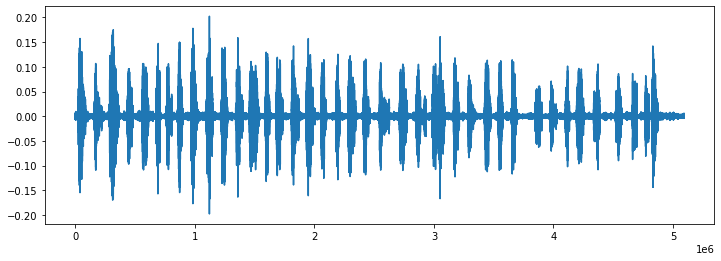

In [ ]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 9946)


In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [ ]:
#apparently they're some columns of audio files which are not part of the audio files we downloaded so i put an except there to skip it and continue to the next one
audio_dataset_path='/content/audio_wav/'
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(df.iterrows()):
    try:
      file_name = os.path.join(os.path.abspath(audio_dataset_path)+'/'+str(row["en"])+'/'+str(row["file_name"]+'.wav'))
      final_class_labels=row["sp"]
      data=features_extractor(file_name)
      extracted_features.append([data,final_class_labels])
    except FileNotFoundError as e:
      print ("FileNotFoundError")
    continue


100it [01:15,  1.17it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
323it [01:15, 83.79it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

519it [01:15, 189.68it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

765it [01:16, 384.29it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

1148it [01:16, 749.69it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

1398it [01:16, 948.95it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

1650it [01:16, 1081.22it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

1923it [02:29,  9.26it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

2162it [02:29, 26.26it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

2421it [02:29, 62.00it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

2673it [02:29, 126.31it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

2937it [02:30, 241.83it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

3193it [02:30, 417.56it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

3345it [02:30, 547.14it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

3716it [04:30, 12.31it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

3949it [04:30, 33.75it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

4192it [04:30, 76.88it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

4436it [04:30, 156.76it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

4678it [04:31, 288.27it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

4927it [04:31, 480.11it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

5178it [04:31, 698.21it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

5429it [04:31, 900.96it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

5687it [04:31, 1065.36it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

5950it [04:32, 1176.40it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

6081it [04:32, 1213.21it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

6420it [05:41, 13.29it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

6651it [05:41, 34.23it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

6909it [05:41, 77.77it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

7154it [05:41, 155.41it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

7300it [05:41, 225.17it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

7691it [07:27, 11.44it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

7910it [07:27, 32.95it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

8163it [07:27, 82.36it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

8512it [07:27, 222.36it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

8751it [07:28, 390.02it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

8885it [07:28, 509.21it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

9166it [08:56,  7.74it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

9412it [08:56, 25.78it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

9653it [08:57, 59.96it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

9896it [08:57, 123.77it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

10266it [08:57, 314.85it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

10700it [10:48, 13.31it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

11022it [10:48, 51.94it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

11291it [10:48, 117.41it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

11547it [10:48, 229.76it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

11670it [10:48, 303.74it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

11963it [12:18,  8.02it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

12222it [12:18, 25.83it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

12469it [12:18, 59.67it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

12715it [12:19, 122.07it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

12958it [12:19, 229.47it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

13205it [12:19, 399.30it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

13463it [12:19, 626.07it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

13849it [14:36, 10.33it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

14100it [14:36, 34.62it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

14363it [14:36, 83.41it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

14720it [14:36, 220.54it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

14958it [14:36, 379.33it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

15295it [16:07,  9.81it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

15538it [16:07, 27.12it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

15844it [16:07, 68.47it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

16098it [16:07, 133.96it/s]

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

16261it [16:07, 16.80it/s] 

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-500.82684, 107.14313, -3.344441, 34.040825, ...",caeruleus
1,"[-366.34457, 73.17468, 20.086449, 9.199894, -3...",caeruleus
2,"[-418.17493, 15.944333, -35.16751, 21.189898, ...",caeruleus
3,"[-314.2878, 24.23127, -19.524172, 41.303543, -...",caeruleus
4,"[-320.67078, 48.289703, -49.017834, 12.862004,...",caeruleus


In [ ]:
#i didnt train the model because the next time i tried to run the code the mp3 files were giving a permission error when i tried converting them to wav

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
### No of classes
num_labels=y.shape[1]

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

In [ ]:
#ignore all code below this

In [ ]:
import math, random
import torch
import torchaudio
from torchaudio import transforms
from IPython.display import Audio

class AudioUtil():
  # ----------------------------
  # Load an audio file. Return the signal as a tensor and the sample rate
  # ----------------------------
  @staticmethod
  def open(audio_file):
    sig, sr = torchaudio.load(audio_file)
    return (sig, sr)

In [ ]:
def rechannel(aud, new_channel):
    sig, sr = aud

    if (sig.shape[0] == new_channel):
      # Nothing to do
      return aud

    if (new_channel == 1):
      # Convert from stereo to mono by selecting only the first channel
      resig = sig[:1, :]
    else:
      # Convert from mono to stereo by duplicating the first channel
      resig = torch.cat([sig, sig])

    return ((resig, sr))

In [ ]:
def resample(aud, newsr):
    sig, sr = aud

    if (sr == newsr):
      # Nothing to do
      return aud

    num_channels = sig.shape[0]
    # Resample first channel
    resig = torchaudio.transforms.Resample(sr, newsr)(sig[:1,:])
    if (num_channels > 1):
      # Resample the second channel and merge both channels
      retwo = torchaudio.transforms.Resample(sr, newsr)(sig[1:,:])
      resig = torch.cat([resig, retwo])

    return ((resig, newsr))

In [ ]:
def pad_trunc(aud, max_ms):
    sig, sr = aud
    num_rows, sig_len = sig.shape
    max_len = sr//1000 * max_ms

    if (sig_len > max_len):
      # Truncate the signal to the given length
      sig = sig[:,:max_len]

    elif (sig_len < max_len):
      # Length of padding to add at the beginning and end of the signal
      pad_begin_len = random.randint(0, max_len - sig_len)
      pad_end_len = max_len - sig_len - pad_begin_len

      # Pad with 0s
      pad_begin = torch.zeros((num_rows, pad_begin_len))
      pad_end = torch.zeros((num_rows, pad_end_len))

      sig = torch.cat((pad_begin, sig, pad_end), 1)
      
    return (sig, sr)

In [ ]:
def time_shift(aud, shift_limit):
    sig,sr = aud
    _, sig_len = sig.shape
    shift_amt = int(random.random() * shift_limit * sig_len)
    return (sig.roll(shift_amt), sr)

In [ ]:
def spectro_gram(aud, n_mels=64, n_fft=1024, hop_len=None):
    sig,sr = aud
    top_db = 80

    # spec has shape [channel, n_mels, time], where channel is mono, stereo etc
    spec = transforms.MelSpectrogram(sr, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)(sig)

    # Convert to decibels
    spec = transforms.AmplitudeToDB(top_db=top_db)(spec)
    return (spec)

In [ ]:
def spectro_augment(spec, max_mask_pct=0.1, n_freq_masks=1, n_time_masks=1):
    _, n_mels, n_steps = spec.shape
    mask_value = spec.mean()
    aug_spec = spec

    freq_mask_param = max_mask_pct * n_mels
    for _ in range(n_freq_masks):
      aug_spec = transforms.FrequencyMasking(freq_mask_param)(aug_spec, mask_value)

    time_mask_param = max_mask_pct * n_steps
    for _ in range(n_time_masks):
      aug_spec = transforms.TimeMasking(time_mask_param)(aug_spec, mask_value)

    return aug_spec

In [ ]:
from torch.utils.data import DataLoader, Dataset, random_split
import torchaudio

# ----------------------------
# Sound Dataset
# ----------------------------
class SoundDS(Dataset):
  def __init__(self, df, data_path):
    self.df = df
    self.data_path = str(data_path)
    self.duration = 4000
    self.sr = 44100
    self.channel = 2
    self.shift_pct = 0.4
            
  # ----------------------------
  # Number of items in dataset
  # ----------------------------
  def __len__(self):
    return len(self.df)    
    
  # ----------------------------
  # Get i'th item in dataset
  # ----------------------------
  def __getitem__(self, idx):
    # Absolute file path of the audio file - concatenate the audio directory with
    # the relative path
    audio_file = self.data_path + self.df.loc[idx, 'path']
    # Get the Class ID
    class_id = self.df.loc[idx, 'sp']

    aud = AudioUtil.open(audio_file)
    # Some sounds have a higher sample rate, or fewer channels compared to the
    # majority. So make all sounds have the same number of channels and same 
    # sample rate. Unless the sample rate is the same, the pad_trunc will still
    # result in arrays of different lengths, even though the sound duration is
    # the same.
    reaud = AudioUtil.resample(aud, self.sr)
    rechan = AudioUtil.rechannel(reaud, self.channel)

    dur_aud = AudioUtil.pad_trunc(rechan, self.duration)
    shift_aud = AudioUtil.time_shift(dur_aud, self.shift_pct)
    sgram = AudioUtil.spectro_gram(shift_aud, n_mels=64, n_fft=1024, hop_len=None)
    aug_sgram = AudioUtil.spectro_augment(sgram, max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)

    return aug_sgram, class_id


In [ ]:
from torch.utils.data import random_split

myds = SoundDS(df,data_path)

# Random split of 80:20 between training and validation
num_items = len(myds)
num_train = round(num_items * 0.8)
num_val = num_items - num_train
train_ds, val_ds = random_split(myds, [num_train, num_val])

# Create training and validation data loaders
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=16, shuffle=True)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size=16, shuffle=False)

NameError: ignored

In [ ]:
import torch.nn.functional as F
from torch.nn import init
import torch
import torch.nn as nn


# ----------------------------
# Audio Classification Model
# ----------------------------
class AudioClassifier (nn.Module):
    # ----------------------------
    # Build the model architecture
    # ----------------------------
    def __init__(self):
        super().__init__()
        conv_layers = []

        # First Convolution Block with Relu and Batch Norm. Use Kaiming Initialization
        self.conv1 = nn.Conv2d(2, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm2d(8)
        init.kaiming_normal_(self.conv1.weight, a=0.1)
        self.conv1.bias.data.zero_()
        conv_layers += [self.conv1, self.relu1, self.bn1]

        # Second Convolution Block
        self.conv2 = nn.Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm2d(16)
        init.kaiming_normal_(self.conv2.weight, a=0.1)
        self.conv2.bias.data.zero_()
        conv_layers += [self.conv2, self.relu2, self.bn2]

        # Second Convolution Block
        self.conv3 = nn.Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu3 = nn.ReLU()
        self.bn3 = nn.BatchNorm2d(32)
        init.kaiming_normal_(self.conv3.weight, a=0.1)
        self.conv3.bias.data.zero_()
        conv_layers += [self.conv3, self.relu3, self.bn3]

        # Second Convolution Block
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu4 = nn.ReLU()
        self.bn4 = nn.BatchNorm2d(64)
        init.kaiming_normal_(self.conv4.weight, a=0.1)
        self.conv4.bias.data.zero_()
        conv_layers += [self.conv4, self.relu4, self.bn4]

        # Linear Classifier
        self.ap = nn.AdaptiveAvgPool2d(output_size=1)
        self.lin = nn.Linear(in_features=64, out_features=10)

        # Wrap the Convolutional Blocks
        self.conv = nn.Sequential(*conv_layers)
 
    # ----------------------------
    # Forward pass computations
    # ----------------------------
    def forward(self, x):
        # Run the convolutional blocks
        x = self.conv(x)

        # Adaptive pool and flatten for input to linear layer
        x = self.ap(x)
        x = x.view(x.shape[0], -1)

        # Linear layer
        x = self.lin(x)

        # Final output
        return x

# Create the model and put it on the GPU if available
myModel = AudioClassifier()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
myModel = myModel.to(device)
# Check that it is on Cuda
next(myModel.parameters()).device

device(type='cpu')

In [ ]:
def training(model, train_dl, num_epochs):
  # Loss Function, Optimizer and Scheduler
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
  scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001,
                                                steps_per_epoch=int(len(train_dl)),
                                                epochs=num_epochs,
                                                anneal_strategy='linear')

  # Repeat for each epoch
  for epoch in range(num_epochs):
    running_loss = 0.0
    correct_prediction = 0
    total_prediction = 0

    # Repeat for each batch in the training set
    for i, data in enumerate(train_dl):
        # Get the input features and target labels, and put them on the GPU
        inputs, labels = data[0].to(device), data[1].to(device)

        # Normalize the inputs
        inputs_m, inputs_s = inputs.mean(), inputs.std()
        inputs = (inputs - inputs_m) / inputs_s

        # Zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

        # Keep stats for Loss and Accuracy
        running_loss += loss.item()

        # Get the predicted class with the highest score
        _, prediction = torch.max(outputs,1)
        # Count of predictions that matched the target label
        correct_prediction += (prediction == labels).sum().item()
        total_prediction += prediction.shape[0]

        #if i % 10 == 0:    # print every 10 mini-batches
        #    print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 10))
    
    # Print stats at the end of the epoch
    num_batches = len(train_dl)
    avg_loss = running_loss / num_batches
    acc = correct_prediction/total_prediction
    print(f'Epoch: {epoch}, Loss: {avg_loss:.2f}, Accuracy: {acc:.2f}')

  print('Finished Training')
  
num_epochs=2   # Just for demo, adjust this higher.
training(myModel, train_dl, num_epochs)

KeyError: ignored

In [ ]:
!pip install mrcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51 kB 271 kB/s 
  Created wheel for mrcnn: filename=mrcnn-0.2-py3-none-any.whl size=54932 sha256=ebbeec6db5fd454584a95ad868f126b9ac51143dc9d7c68d2e4b337298661c6f
  Stored in directory: /root/.cache/pip/wheels/1d/94/0d/03ff96abc43d2d6c8299a92cbb4eced2a1eda3ca7911c19427
Successfully built mrcnn


In [ ]:
!pip install numpy
!pip install scipy
!pip install Pillow
!pip install cython
!pip install scikit-image
!pip install h5py
!pip install imgaug
!pip install IPython
!pip install tensorflow>=1.3.0
!pip install keras>=2.0.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 9.7 MB/s 
